<a href="https://colab.research.google.com/github/ElmirGuluyev/Sentiment_Analysis_1/blob/main/HW2_Elmir_Guluyev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Elmir Guluyev, NLP

First, we are importing all the libraries that we need.


In [ ]:
# We are importing the libraries that we need

import nltk
import json 
import gzip
import pandas as pd
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize, TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk.util import ngrams
from nltk.collocations import *
from sklearn.model_selection import KFold
import re
import itertools
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
# Extracting the list of dictionaries from the json file

data = []
from google.colab import drive
drive.mount('/drive')

infile = open("/drive/My Drive/Colab Notebooks/Wed_Homework1/Amazon_Instant_Video_5.json", 'r')

for line in infile:
        data.append(json.loads(line))

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
data[10:13] # Checking the list

[{'reviewerID': 'AXM3GQLD0CHIL',
  'asin': 'B000H0X79O',
  'reviewerName': 'Ray Shiva',
  'helpful': [0, 0],
  'reviewText': 'Funny, interesting, a great way to pass time. I usually enjoy standup comedy and is this is a good show for me.',
  'overall': 4.0,
  'summary': 'Worth watching!',
  'unixReviewTime': 1391731200,
  'reviewTime': '02 7, 2014'},
 {'reviewerID': 'A398QSASJOIKA6',
  'asin': 'B000H29TXU',
  'reviewerName': 'Amazon Customer',
  'helpful': [0, 0],
  'reviewText': "I love the variety of comics.  Great for dinner TV entertainment because of length of each episode.  Many of the featured comics have gone on to even bigger TV specials so it's great to see some of their earlier material.",
  'overall': 4.0,
  'summary': 'comedy club quality without leaving your home',
  'unixReviewTime': 1391644800,
  'reviewTime': '02 6, 2014'},
 {'reviewerID': 'A2U61O0KWJH3MM',
  'asin': 'B000H29TXU',
  'reviewerName': 'Cathy P.',
  'helpful': [0, 1],
  'reviewText': 'comedy is a matter of

In [ ]:
# Extracting the reviews from a dictionary to a list
list_rt = [d['reviewText'] for d in data] # A list of strings for each review
list_o = [d['overall'] for d in data] # A list of strings for each overall rating
list_s = [d['summary'] for d in data] # A list of strings for each overall summary

## Disclaimer!

You don't really have to run the 3 cells below to get the documents. As we won't need them. So you can skip following 3 cells.



In [ ]:
# Creating a txt file for the reviews and then dumping reviews into that text file
# open file in write mode
with open(r'C:\\Users\\Lenovo\\OneDrive\\Desktop\\reviewText.txt', 'w') as fp:
    for item in list_rt:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


In [ ]:
# Creating a txt file for the overall and then dumping str into that text file
# open file in write mode
with open(r'C:\\Users\\Lenovo\\OneDrive\\Desktop\\overall.txt', 'w') as fp:
    for item in list_o:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


In [ ]:
# Creating a txt file for the summary and then dumping str into that text file
# open file in write mode
with open(r'C:\\Users\\Lenovo\\OneDrive\\Desktop\\summary.txt', 'w') as fp:
    for item in list_s:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


## Descriptive statistics

So, here we are staring to do some desriptive statistics do find out about the parts of speech, their frequncy and so on.


In [ ]:
review_list = []
sentence_list = []

# So, my following code is tokenizes each review into sentences and creates the data frame that will have "text" which is the review corpus. And also, each row will have a unique 
# sentence from that review.

# iterate over each review in the reviews list
for review in list_rt[:3000]:
    # tokenize the review into sentences
    sentences = sent_tokenize(review)
    
    # iterate over each sentence in the sentences list
    for sentence in sentences:
        # append the original review and sentence to their respective lists
        review_list.append(review)
        sentence_list.append(sentence)

# create a pandas dataframe from the review and sentence lists
df_r = pd.DataFrame({'text': review_list, 'sentences': sentence_list})

In [ ]:
# The code below just tokenizes the sentences that we have and creates a new column where the tokens of the corresponding sentence are stored.

lst_t = [] # Intiaitng emtpty list
for r in df_r['sentences']: # Tokenizing the sentences
    lst_t.append(nltk.word_tokenize(r)) # Appending to the list
df_r['tokens'] = lst_t # list to column

In [ ]:
lst = [] # Intiaitng emtpty list
for r in df_r['tokens']: # Finding part-of-speech for each token
    lst.append(nltk.pos_tag(r)) # Appending to the list
df_r['parts'] = lst # list to column

In [ ]:
df_r.head()


18977

In [ ]:
# So, initially I used df as a sample from df_r. But as I were able to increase the RAM of the Google Colab. I am using full
# data set. However, I didn't want to go around and change this variable everywhere. So, I am leaving it here.

df = df_r.copy() 

In [ ]:
df.head(10) # Examining the data

,text,sentences,tokens,parts
0,I had big expectations because I love English ...,I had big expectations because I love English ...,"[I, had, big, expectations, because, I, love, ...","[(I, PRP), (had, VBD), (big, JJ), (expectation..."
1,I had big expectations because I love English ...,It didn't appeal to me at all.,"[It, did, n't, appeal, to, me, at, all, .]","[(It, PRP), (did, VBD), (n't, RB), (appeal, VB..."
2,I highly recommend this series. It is a must f...,I highly recommend this series.,"[I, highly, recommend, this, series, .]","[(I, PRP), (highly, RB), (recommend, VBP), (th..."
3,I highly recommend this series. It is a must f...,It is a must for anyone who is yearning to wat...,"[It, is, a, must, for, anyone, who, is, yearni...","[(It, PRP), (is, VBZ), (a, DT), (must, MD), (f..."
4,I highly recommend this series. It is a must f...,Complex characters and plots to keep one total...,"[Complex, characters, and, plots, to, keep, on...","[(Complex, JJ), (characters, NNS), (and, CC), ..."
5,I highly recommend this series. It is a must f...,Thank you Amazin Prime.,"[Thank, you, Amazin, Prime, .]","[(Thank, NNP), (you, PRP), (Amazin, VBP), (Pri..."
6,This one is a real snoozer. Don't believe anyt...,This one is a real snoozer.,"[This, one, is, a, real, snoozer, .]","[(This, DT), (one, CD), (is, VBZ), (a, DT), (r..."
7,This one is a real snoozer. Don't believe anyt...,"Don't believe anything you read or hear, it's ...","[Do, n't, believe, anything, you, read, or, he...","[(Do, VBP), (n't, RB), (believe, VB), (anythin..."
8,This one is a real snoozer. Don't believe anyt...,I had no idea what the title means.,"[I, had, no, idea, what, the, title, means, .]","[(I, PRP), (had, VBD), (no, DT), (idea, NN), (..."
9,This one is a real snoozer. Don't believe anyt...,Neither will you.,"[Neither, will, you, .]","[(Neither, CC), (will, MD), (you, PRP), (., .)]"


In [ ]:
# So the code below creates a new column which has a tuples of tokens and corresponding POS tags as a dictionary of keys and values. 
# Because it is really easy to work with dictionaries rather than tuples.

lsts = [] 
for r in df['parts']:
    lsts.append(dict(r))
df['parts_d'] = lsts
    

In [ ]:
df.head(10) # Examining the new column

,text,sentences,tokens,parts,parts_d
0,I had big expectations because I love English ...,I had big expectations because I love English ...,"[I, had, big, expectations, because, I, love, ...","[(I, PRP), (had, VBD), (big, JJ), (expectation...","{'I': 'PRP', 'had': 'VBD', 'big': 'JJ', 'expec..."
1,I had big expectations because I love English ...,It didn't appeal to me at all.,"[It, did, n't, appeal, to, me, at, all, .]","[(It, PRP), (did, VBD), (n't, RB), (appeal, VB...","{'It': 'PRP', 'did': 'VBD', 'n't': 'RB', 'appe..."
2,I highly recommend this series. It is a must f...,I highly recommend this series.,"[I, highly, recommend, this, series, .]","[(I, PRP), (highly, RB), (recommend, VBP), (th...","{'I': 'PRP', 'highly': 'RB', 'recommend': 'VBP..."
3,I highly recommend this series. It is a must f...,It is a must for anyone who is yearning to wat...,"[It, is, a, must, for, anyone, who, is, yearni...","[(It, PRP), (is, VBZ), (a, DT), (must, MD), (f...","{'It': 'PRP', 'is': 'VBZ', 'a': 'DT', 'must': ..."
4,I highly recommend this series. It is a must f...,Complex characters and plots to keep one total...,"[Complex, characters, and, plots, to, keep, on...","[(Complex, JJ), (characters, NNS), (and, CC), ...","{'Complex': 'JJ', 'characters': 'NNS', 'and': ..."
5,I highly recommend this series. It is a must f...,Thank you Amazin Prime.,"[Thank, you, Amazin, Prime, .]","[(Thank, NNP), (you, PRP), (Amazin, VBP), (Pri...","{'Thank': 'NNP', 'you': 'PRP', 'Amazin': 'VBP'..."
6,This one is a real snoozer. Don't believe anyt...,This one is a real snoozer.,"[This, one, is, a, real, snoozer, .]","[(This, DT), (one, CD), (is, VBZ), (a, DT), (r...","{'This': 'DT', 'one': 'CD', 'is': 'VBZ', 'a': ..."
7,This one is a real snoozer. Don't believe anyt...,"Don't believe anything you read or hear, it's ...","[Do, n't, believe, anything, you, read, or, he...","[(Do, VBP), (n't, RB), (believe, VB), (anythin...","{'Do': 'VBP', 'n't': 'RB', 'believe': 'VB', 'a..."
8,This one is a real snoozer. Don't believe anyt...,I had no idea what the title means.,"[I, had, no, idea, what, the, title, means, .]","[(I, PRP), (had, VBD), (no, DT), (idea, NN), (...","{'I': 'PRP', 'had': 'VBD', 'no': 'DT', 'idea':..."
9,This one is a real snoozer. Don't believe anyt...,Neither will you.,"[Neither, will, you, .]","[(Neither, CC), (will, MD), (you, PRP), (., .)]","{'Neither': 'CC', 'will': 'MD', 'you': 'PRP', ..."


In [ ]:

# This function looks at the column of dictionaries with tokens and POS tags. And if there are tokens that have adjective as their POS tags,
# the function retains them. Also, if the key(tokens itself) is fully capitalised or is equal to !, the row is retained.

def drop_rows(df, col_name):      
    for index, row in df.iterrows():
        JJ_inside = False    # Intiating the Booleans
        retain_row = False
        for k, v in row[col_name].items(): # Iterating over the dictionaries
            if isinstance(v, str): # If the value is string and also if the value contains 'JJ', (meaning Adjective tag)
                if 'JJ' in v:
                    JJ_inside = True  #Changing the Boolean
                    break
            if k == '!' or (k.isupper() and k != '!'):  # Checking if the Key is fully capitalised or the key is !.
                retain_row = True  #Changing the Boolean
        if not JJ_inside and not retain_row:  #If False anyway
            df.drop(index, inplace=True) # Drop

In [ ]:
drop_rows(df, 'parts_d')  # Applying the function. Inplace is True, so no need to assign

In [ ]:
len(df)  # Checking the length

15946

In [ ]:
# The following function creates the noun list from the sentences. Because we have a dictionary with POS tags, we are going to use that as an input.

def create_noun_list(df, col_name):
    df['NN_list'] = df[col_name].apply(lambda x: [k for k, v in x.items() if isinstance(v, str) and 'NN' in v])
    
create_noun_list(df, 'parts_d')

In [ ]:
# The following function creates the adjective list from the sentence string. The same logic apllies here, as above. 
# We are using lambda function to create a new column with list of adjectives in each row that corresponds to the each sentence.

def create_adjective_list(df, col_name):
    df['JJ_list'] = df[col_name].apply(lambda x: [k for k, v in x.items() if isinstance(v, str) and 'JJ' in v])
create_adjective_list(df, 'parts_d')


In [ ]:
# The following function creates a column that has length of the sentence as its value 

def create_length_column(dataframe, source_column, new_column_name):
    dataframe[new_column_name] = dataframe[source_column].apply(len)
create_length_column(df, 'sentences', 'len_sent')

In [ ]:
# The following function creates a dummy column, where if the sentence has ! then 1 otherwise 0 

def create_flag_column(dataframe, source_column, new_column_name):
    flag_list = [1 if '!' in x.keys() else 0 for x in dataframe[source_column]]  # Using simple if statement and for loop to go over all the rows
    dataframe[new_column_name] = flag_list
create_flag_column(df, 'parts_d', 'exclamation')

In [ ]:
# The following function creates a column that has a list of all the words which are capitalised.

def extract_capitalized_keys(df, col_name):
    capitalized_keys = []
    for index, row in df.iterrows():   # Iterating over the dataframe rows
        keys = row[col_name].keys()    # Using the keys from the dictionary
        capitalized_keys.append([k for k in keys if k.isupper()]) # Applying the condition
    df['capitalized_keys'] = capitalized_keys
    df['capitalized_keys'] = df['capitalized_keys'].apply(lambda x: [] if len(x) == 0 else x) # Applying our function as a lambda function

extract_capitalized_keys(df, 'parts_d')

In [ ]:
df.head()

,text,sentences,tokens,parts,parts_d,NN_list,JJ_list,len_sent,exclamation,capitalized_keys
0,I had big expectations because I love English ...,I had big expectations because I love English ...,"[I, had, big, expectations, because, I, love, ...","[(I, PRP), (had, VBD), (big, JJ), (expectation...","{'I': 'PRP', 'had': 'VBD', 'big': 'JJ', 'expec...","[expectations, TV, Investigative, stuff, guy]","[big, English, particular, detective, boring]",128,0,"[I, TV]"
2,I highly recommend this series. It is a must f...,I highly recommend this series.,"[I, highly, recommend, this, series, .]","[(I, PRP), (highly, RB), (recommend, VBP), (th...","{'I': 'PRP', 'highly': 'RB', 'recommend': 'VBP...",[series],[],31,0,[I]
4,I highly recommend this series. It is a must f...,Complex characters and plots to keep one total...,"[Complex, characters, and, plots, to, keep, on...","[(Complex, JJ), (characters, NNS), (and, CC), ...","{'Complex': 'JJ', 'characters': 'NNS', 'and': ...","[characters, plots]","[Complex, involved]",58,0,[]
6,This one is a real snoozer. Don't believe anyt...,This one is a real snoozer.,"[This, one, is, a, real, snoozer, .]","[(This, DT), (one, CD), (is, VBZ), (a, DT), (r...","{'This': 'DT', 'one': 'CD', 'is': 'VBZ', 'a': ...",[snoozer],[real],27,0,[]
7,This one is a real snoozer. Don't believe anyt...,"Don't believe anything you read or hear, it's ...","[Do, n't, believe, anything, you, read, or, he...","[(Do, VBP), (n't, RB), (believe, VB), (anythin...","{'Do': 'VBP', 'n't': 'RB', 'believe': 'VB', 'a...",[anything],[awful],52,0,[]


In [ ]:

# The following function exctracts the bigrams from the sentences, however certainly using some conditions
def extract_bigrams(row):
    bigrams = []   # initiating empty list
    prev_token = None  # Assigning None because first token doesn't have previous token coming before it
    for token, pos in row.items():    #Iterating over each dictionary, where token is key, and pos is the value
        if pos.startswith(('N', 'V', 'J')) and prev_token and row[prev_token].startswith(('N', 'V', 'J')): # Only if the bigram contains the following parts of speech: ('N', 'V', 'J')
            bigrams.append((prev_token, token))
        prev_token = token # In each iteration prev_token will be the token from the previous iteration
    return bigrams


# apply the function to each row in the dataframe
df['bigrams'] = df['parts_d'].apply(extract_bigrams)


In [ ]:
df.head(100)

,text,sentences,tokens,parts,parts_d,NN_list,JJ_list,len_sent,exclamation,capitalized_keys,bigrams,reviewT,summary
0,I had big expectations because I love English ...,I had big expectations because I love English ...,"[I, had, big, expectations, because, I, love, ...","[(I, PRP), (had, VBD), (big, JJ), (expectation...","{'I': 'PRP', 'had': 'VBD', 'big': 'JJ', 'expec...","[expectations, TV, Investigative, stuff, guy]","[big, English, particular, detective, boring]",128,0,"[I, TV]","[(had, big), (big, expectations), (love, Engli...",1,0
2,I highly recommend this series. It is a must f...,I highly recommend this series.,"[I, highly, recommend, this, series, .]","[(I, PRP), (highly, RB), (recommend, VBP), (th...","{'I': 'PRP', 'highly': 'RB', 'recommend': 'VBP...",[series],0,31,0,[I],0,1,0
4,I highly recommend this series. It is a must f...,Complex characters and plots to keep one total...,"[Complex, characters, and, plots, to, keep, on...","[(Complex, JJ), (characters, NNS), (and, CC), ...","{'Complex': 'JJ', 'characters': 'NNS', 'and': ...","[characters, plots]","[Complex, involved]",58,0,0,"[(Complex, characters)]",1,0
6,This one is a real snoozer. Don't believe anyt...,This one is a real snoozer.,"[This, one, is, a, real, snoozer, .]","[(This, DT), (one, CD), (is, VBZ), (a, DT), (r...","{'This': 'DT', 'one': 'CD', 'is': 'VBZ', 'a': ...",[snoozer],[real],27,0,0,"[(real, snoozer)]",1,0
7,This one is a real snoozer. Don't believe anyt...,"Don't believe anything you read or hear, it's ...","[Do, n't, believe, anything, you, read, or, he...","[(Do, VBP), (n't, RB), (believe, VB), (anythin...","{'Do': 'VBP', 'n't': 'RB', 'believe': 'VB', 'a...",[anything],[awful],52,0,0,"[(believe, anything), ('s, awful)]",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,Got these for my son's birthday. He says they ...,They are funny so give them a try!,"[They, are, funny, so, give, them, a, try, !]","[(They, PRP), (are, VBP), (funny, JJ), (so, RB...","{'They': 'PRP', 'are': 'VBP', 'funny': 'JJ', '...",[try],[funny],34,1,0,"[(are, funny)]",1,0
111,Got these for my son's birthday. He says they ...,OK!,"[OK, !]","[(OK, UH), (!, .)]","{'OK': 'UH', '!': '.'}",0,0,3,1,[OK],0,1,0
112,"The show is a little bit dry, but is definitel...","The show is a little bit dry, but is definitel...","[The, show, is, a, little, bit, dry, ,, but, i...","[(The, DT), (show, NN), (is, VBZ), (a, DT), (l...","{'The': 'DT', 'show': 'NN', 'is': 'VBZ', 'a': ...","[show, bit, episodes, series.Characters, age, ...","[little, dry, funny.Have, first, funny, easy]",235,0,0,"[(show, is), (little, bit), (bit, dry), (were,...",1,0
113,This show is plain dumb and not funny. It is s...,This show is plain dumb and not funny.,"[This, show, is, plain, dumb, and, not, funny, .]","[(This, DT), (show, NN), (is, VBZ), (plain, JJ...","{'This': 'DT', 'show': 'NN', 'is': 'VBZ', 'pla...",[show],"[plain, dumb, funny]",38,0,0,"[(show, is), (is, plain), (plain, dumb)]",1,0


In [ ]:
# The code assigns zero value if the list in the value place is empty.
for column in ['NN_list', 'JJ_list', 'capitalized_keys', 'bigrams']:
    df[column] = df[column].apply(lambda x: 0 if not x else x)
    

In [ ]:
# because this is a review data set, we create a dummy variables and assign 1 to the reviewT column and 0 to summary column

df['reviewT'] = [1] * len(df)
df['summary'] = [0] * len(df)

In [ ]:
# After creating the bigrams, I am preprocessing them, specifically by lowercasing it
# Preprocessing the bigrams 

def lowercase_bigrams(x):
    if isinstance(x, list) and all(isinstance(elem, str) for elem in x): # Because we have zeros in the Pd series(column), I make sure that function applies only to actual bigrams
        return [word[0].lower() + ' ' + word[1].lower() for word in x]
    else:
        return x

df['bigrams'] = df['bigrams'].apply(lowercase_bigrams)


### Doing the same thing with the summary data
I didn't comment on the following steps, because they are quite similar to the first part. Actually, they are identical.

In [ ]:
summary_list = []
sentence_list = []

# iterate over each review in the reviews list
for summary in list_s[:3000]:
    # tokenize the review into sentences
    sentences = sent_tokenize(summary)
    
    # iterate over each sentence in the sentences list
    for sentence in sentences:
        # append the original review and sentence to their respective lists
        summary_list.append(summary)
        sentence_list.append(sentence)

# create a pandas dataframe from the review and sentence lists
df_s = pd.DataFrame({'text': summary_list, 'sentences': sentence_list})

In [ ]:
lst_t = []
for r in df_s['sentences']:
    lst_t.append(nltk.word_tokenize(r))
df_s['tokens'] = lst_t

In [ ]:
lst = []
for r in df_s['tokens']:
    lst.append(nltk.pos_tag(r))
df_s['parts'] = lst    

In [ ]:
df1 = df_s.copy()

In [ ]:
lsts = []
for r in df1['parts']:
    lsts.append(dict(r))
df1['parts_d'] = lsts
    

In [ ]:
drop_rows(df1, 'parts_d')

In [ ]:
create_noun_list(df1, 'parts_d')

In [ ]:
create_adjective_list(df1, 'parts_d')

In [ ]:

create_length_column(df1, 'sentences', 'len_sent')

In [ ]:

create_flag_column(df1, 'parts_d', 'exclamation')

In [ ]:
extract_capitalized_keys(df1, 'parts_d')

In [ ]:
# apply the function to each row in the dataframe
df1['bigrams'] = df1['parts_d'].apply(extract_bigrams)

# Preprocessing the bigrams 
df1['bigrams'] = df1['bigrams'].apply(lowercase_bigrams)

In [ ]:
for column in ['NN_list', 'JJ_list', 'capitalized_keys','bigrams']:
    df1[column] = df1[column].apply(lambda x: 0 if not x else x)
df1['reviewT'] = [0] * len(df1)
df1['summary'] = [1] * len(df1)    

In [ ]:
len(df1)

1934

In [ ]:
# I am just merging both data sets into one.

merged = pd.concat([df, df1], axis=0)
len(merged)

17880

In [ ]:
merged.head()

,text,sentences,tokens,parts,parts_d,NN_list,JJ_list,len_sent,exclamation,capitalized_keys,bigrams,reviewT,summary
0,I had big expectations because I love English ...,I had big expectations because I love English ...,"[I, had, big, expectations, because, I, love, ...","[(I, PRP), (had, VBD), (big, JJ), (expectation...","{'I': 'PRP', 'had': 'VBD', 'big': 'JJ', 'expec...","[expectations, TV, Investigative, stuff, guy]","[big, English, particular, detective, boring]",128,0,"[I, TV]","[(had, big), (big, expectations), (love, Engli...",1,0
2,I highly recommend this series. It is a must f...,I highly recommend this series.,"[I, highly, recommend, this, series, .]","[(I, PRP), (highly, RB), (recommend, VBP), (th...","{'I': 'PRP', 'highly': 'RB', 'recommend': 'VBP...",[series],0,31,0,[I],0,1,0
4,I highly recommend this series. It is a must f...,Complex characters and plots to keep one total...,"[Complex, characters, and, plots, to, keep, on...","[(Complex, JJ), (characters, NNS), (and, CC), ...","{'Complex': 'JJ', 'characters': 'NNS', 'and': ...","[characters, plots]","[Complex, involved]",58,0,0,"[(Complex, characters)]",1,0
6,This one is a real snoozer. Don't believe anyt...,This one is a real snoozer.,"[This, one, is, a, real, snoozer, .]","[(This, DT), (one, CD), (is, VBZ), (a, DT), (r...","{'This': 'DT', 'one': 'CD', 'is': 'VBZ', 'a': ...",[snoozer],[real],27,0,0,"[(real, snoozer)]",1,0
7,This one is a real snoozer. Don't believe anyt...,"Don't believe anything you read or hear, it's ...","[Do, n't, believe, anything, you, read, or, he...","[(Do, VBP), (n't, RB), (believe, VB), (anythin...","{'Do': 'VBP', 'n't': 'RB', 'believe': 'VB', 'a...",[anything],[awful],52,0,0,"[(believe, anything), ('s, awful)]",1,0


In [ ]:
# Creating a document for the final result

# merged.to_csv(r'merged.csv')

In [ ]:
print(merged[merged['reviewT'] == 0]['len_sent'].mean())
print(merged[merged['reviewT'] == 1]['len_sent'].mean())

26.60910031023785
118.87150382541076


In [ ]:
import numpy as np

def compute_mean_list_length(df, col_name):
    # Creating a new column in the DataFrame called '{}_len', which contains the length of each list in the '{}'
    # Column, but only for rows where the '{}' column contains a list. For rows where the '{}' column contains
    # anything other than a list, insert NaN.
    df['{}_len'.format(col_name)] = df[col_name].apply(lambda x: len(x) if isinstance(x, list) else np.nan)
    
    # Calculating the mean of the '{}_len' column for all rows where the column is not null (i.e., not NaN).
    mean_len = np.nanmean(df[df['{}_len'.format(col_name)].notnull()]['{}_len'.format(col_name)])
    
    # Dropping the '{}_len' column from the DataFrame.
    df.drop('{}_len'.format(col_name), axis=1, inplace=True)
    
    # Returning the mean length of the lists in the '{}_len' column.
    return mean_len

In [ ]:
print(compute_mean_list_length(merged.loc[merged['reviewT'] == 0].copy(), 'NN_list'))
print(compute_mean_list_length(merged.loc[merged['reviewT'] == 1].copy(), 'NN_list'))

2.147477360931436
5.622585924713584


In [ ]:
print(compute_mean_list_length(merged.loc[merged['reviewT'] == 0].copy(), 'JJ_list'))
print(compute_mean_list_length(merged.loc[merged['reviewT'] == 1].copy(), 'JJ_list'))

1.2472178060413355
2.257620737093621


In [ ]:
print(compute_mean_list_length(merged.loc[merged['reviewT'] == 0].copy(), 'bigrams'))
print(compute_mean_list_length(merged.loc[merged['reviewT'] == 1].copy(), 'bigrams'))

1.83971119133574
5.1927235634138045


## Remarks on the descriptive analysis

I would start by saying that the majority of the sentences comes from the review text, which is quite straightforward considering that each review contains much more sentences than the summary text. I haven't specifically did the preprocessing on the tokens, as for sentiment analysis we would only want to do the lowercasing, but not the lemantization or stemming. Also, I did some preprocessing by lower casing on the bigrams after I created them. 
In general, at the first sight it seams that most of the sentences are on average are 108 long if we take the average of the len_sent column "merged['len_sent'].mean()". And also, I would want to not that for summary the average length is 108, while for the reviewT the average lenght is 26. The other instances can be further analysed using the merged.csv file on its own. 

## Sentiment analysis

We are initialising the sentiment analysis here. I don't want to comment to much here, because this code and some of the following ones were taken from the lab 5 notebook file.

Sentiment analysis, also known as opinion mining, is the process of using natural language processing (NLP) and machine learning techniques to identify and extract subjective information from text data. It involves analyzing the text data to determine the emotional tone or attitude expressed towards a particular topic, brand, product, or service.

Sentiment analysis typically involves classifying text as positive, negative, or neutral, based on the presence of certain keywords, phrases, or contextual clues. It can be applied to a wide range of text sources, including social media posts, customer reviews, news articles, and survey responses.

In [ ]:
# We are importing the movie review sentences
import ssl
import nltk
nltk.download('sentence_polarity')

# create an SSL context that does not verify SSL certificates

# Uncomment the following code if you run into the ssl certificate error
# ssl._create_default_https_context = ssl._create_unverified_context 

from nltk.corpus import sentence_polarity

import random

[nltk_data] Downloading package sentence_polarity to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping corpora/sentence_polarity.zip.


In [ ]:

# This chunk of code is from the lab 5 and basically shows the sentences and categories of those sentences.

sentences = sentence_polarity.sents()
print(len(sentences))
print(sentence_polarity.categories())

# sentences are already tokenized,so we are pringting the first 5 to look and check
for sent in sentences[:5]:
    print(sent)

# We want to see how many positives and how many negative senetences we have
pos_sents = sentence_polarity.sents(categories='pos')
print(len(pos_sents))
neg_sents = sentence_polarity.sents(categories='neg')
print(len(neg_sents))

10662
['neg', 'pos']
['simplistic', ',', 'silly', 'and', 'tedious', '.']
["it's", 'so', 'laddish', 'and', 'juvenile', ',', 'only', 'teenage', 'boys', 'could', 'possibly', 'find', 'it', 'funny', '.']
['exploitative', 'and', 'largely', 'devoid', 'of', 'the', 'depth', 'or', 'sophistication', 'that', 'would', 'make', 'watching', 'such', 'a', 'graphic', 'treatment', 'of', 'the', 'crimes', 'bearable', '.']
['[garbus]', 'discards', 'the', 'potential', 'for', 'pathological', 'study', ',', 'exhuming', 'instead', ',', 'the', 'skewed', 'melodrama', 'of', 'the', 'circumstantial', 'situation', '.']
['a', 'visually', 'flashy', 'but', 'narratively', 'opaque', 'and', 'emotionally', 'vapid', 'exercise', 'in', 'style', 'and', 'mystification', '.']
5331
5331


In [ ]:

# So here, we basically create a documents where each document is the sentence and we also attach its label
documents = [(sent, cat) for cat in sentence_polarity.categories() 
	for sent in sentence_polarity.sents(categories=cat)]

# In this list, each item is a pair (sent,cat) where sent is a list of words 
# from a movie review sentence and cat is its label, either ‘pos’ or ‘neg’.

# Taking a look into the pair
print(documents[0])


(['simplistic', ',', 'silly', 'and', 'tedious', '.'], 'neg')


In [ ]:
# Since the documents are in order by label, we mix them up for later separation into training and test sets.
random.shuffle(documents)

# We need to define the set of words that will be used for features.  
# This is essentially all the words in the entire document collection, 
# except that we will limit it to the 2000 most frequent words.  
# Note that we lowercase the words, but do not do stemming or remove stopwords.

all_words_list = [word for (sent,cat) in documents for word in sent]
all_words = nltk.FreqDist(all_words_list)

# get the 2000 most frequently appearing keywords in the corpus
word_items = all_words.most_common(2000)
word_features = [word for (word,count) in word_items]
print(word_features[:50])


['.', 'the', ',', 'a', 'and', 'of', 'to', 'is', 'in', 'that', 'it', 'as', 'but', 'with', 'film', 'this', 'for', 'its', 'an', 'movie', "it's", 'be', 'on', 'you', 'not', 'by', 'about', 'one', 'more', 'like', 'has', 'are', 'at', 'from', 'than', '"', 'all', '--', 'his', 'have', 'so', 'if', 'or', 'story', 'i', 'too', 'just', 'who', 'into', 'what']


In [ ]:

# Now we can define the features for each document, using just the words, 
# sometimes called the BOW or unigram features.  The feature label will be ‘contains(keyword)’ 
# for each keyword (aka word) in the word_features set, and the value of the feature will be Boolean, 
# according to whether the word is contained in that document.
def document_features(document, word_features):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['V_{}'.format(word)] = (word in document_words)
    return features

# get features sets for a document, including keyword features and category feature
featuresets = [(document_features(d, word_features), c) for (d, c) in documents]

# the feature sets are 2000 words long so you may want to look at one
featuresets[0]

({'V_.': True,
  'V_the': False,
  'V_,': True,
  'V_a': True,
  'V_and': False,
  'V_of': False,
  'V_to': False,
  'V_is': False,
  'V_in': True,
  'V_that': True,
  'V_it': False,
  'V_as': False,
  'V_but': False,
  'V_with': True,
  'V_film': False,
  'V_this': False,
  'V_for': False,
  'V_its': False,
  'V_an': False,
  'V_movie': False,
  "V_it's": False,
  'V_be': False,
  'V_on': False,
  'V_you': False,
  'V_not': False,
  'V_by': False,
  'V_about': False,
  'V_one': False,
  'V_more': False,
  'V_like': False,
  'V_has': False,
  'V_are': False,
  'V_at': True,
  'V_from': False,
  'V_than': False,
  'V_"': False,
  'V_all': False,
  'V_--': False,
  'V_his': False,
  'V_have': False,
  'V_so': False,
  'V_if': False,
  'V_or': False,
  'V_story': False,
  'V_i': False,
  'V_too': False,
  'V_just': False,
  'V_who': False,
  'V_into': False,
  'V_what': False,
  'V_most': False,
  'V_out': False,
  'V_no': False,
  'V_much': False,
  'V_even': False,
  'V_good': False,
  

In [ ]:
# training using naive Baysian classifier, training set is approximately 90% of data
train_set, test_set = featuresets[1000:], featuresets[:1000]
classifier = nltk.NaiveBayesClassifier.train(train_set)

# evaluate the accuracy of the classifier
nltk.classify.accuracy(classifier, test_set)

# the accuracy result may vary since we randomized the documents

0.745

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

#Making two lists for our true and predicted values
real = [label for (text, label) in test_set]
forec = [classifier.classify(text) for (text, label) in test_set]



In [ ]:

#Calculating precision, recall, and F1 score
le = LabelEncoder()
le.fit(real)

# Convert the true and predicted labels to numerical values
y_true_encoded = le.transform(real)
y_pred_encoded = le.transform(forec)

# Calculate precision score
precision = precision_score(y_true_encoded, y_pred_encoded, average='macro')
f1 = f1_score(y_true_encoded, y_pred_encoded, average='macro')
recall = recall_score(y_true_encoded, y_pred_encoded, average='macro')

print(f'Precision: {precision}, F score: {f1}, Recall: {recall}')


Precision: 0.7448239855011582, F score: 0.7448650336027759, Recall: 0.7450269075533347


In [ ]:

flds = 3 # We are initiating an integer object, which shows how many rounds (folds) we are going to do
acc = [] # Intiating accuracy list


kf = KFold(n_splits=flds) # Kfold object

# We are looping over folds here
for r, (train_indices, test_indices) in enumerate(kf.split(featuresets)):
    print("Round:", r+1)
     
    train_set_not = [featuresets[r] for r in train_indices] # Applying on training data set
    test_set_not = [featuresets[r] for r in test_indices] # Appying on the testing data set
    
    classifier2 = nltk.NaiveBayesClassifier.train(train_set_not) #training the classifier
    
    accuracy = nltk.classify.accuracy(classifier2, test_set_not)
    acc.append(accuracy)
    
    print(f"Accuracy: {accuracy} \n")
    

# Printing the average accuracy for three folds
s = sum(acc) / flds
print(f"Average of three: {s}")

Round: 1
Accuracy: 0.7371975239167136 

Round: 2
Accuracy: 0.7490151941474396 

Round: 3
Accuracy: 0.7383230163196398 

Average of three: 0.7415119114612643


## Negations and Stopwords removal

Negation handling and stop word removal are common techniques used in natural language processing to improve the accuracy of text analysis.

Negation handling involves identifying and modifying the meaning of words in a sentence when they appear in a negated context. For example, the word "good" in the sentence "This is not good" has a different meaning than the word "good" in the sentence "This is good". Negation handling algorithms recognize negation words (e.g., "not", "never", "no") and modify the meaning of the words that follow them to reflect the opposite of their usual meaning. Negation handling is important because it can significantly affect the sentiment of a sentence, and can lead to incorrect sentiment analysis if not handled properly.

Stop word removal involves removing common words that are unlikely to have any significant meaning in the context of text analysis. Examples of stop words include "a", "an", "the", "and", "in", "on", "at", etc. Stop word removal can improve text analysis accuracy by reducing the number of words that need to be analyzed and focusing on the most important words. This can also help to reduce the computational complexity of text analysis algorithms.

Both negation handling and stop word removal are important techniques in natural language processing and can help to improve the accuracy of text analysis tasks such as sentiment analysis, topic modeling, and information retrieval.

I am using here the code from the lab, so I don't want to comment to much, but I will add some lines of comment for complicated code.

In [ ]:

negationwords = ['no', 'not', 'never', 'none', 'nowhere', 'nothing', 'noone', 'rather', 'hardly', 'scarcely', 'rarely', 'seldom', 'neither', 'nor']

# Defining a function that creates a feature set for a document with negation handling
def NOT_features(document, word_features, negationwords):
    features = {}   # Creating an empty dictionary of features
    for word in word_features: # Looping through each word in word_features and add two features to the dictionary for each word
        features['V_{}'.format(word)] = False
        features['V_NOT{}'.format(word)] = False
    for i in range(0, len(document)):  # Looping through the words in the document in order
        word = document[i]
        if ((i + 1) < len(document)) and ((word in negationwords) or (word.endswith("n't"))):   # If the word is in negationwords or ends with "n't", skip it and add the next word to the features dictionary in a negated context
            i += 1
            features['V_NOT{}'.format(document[i])] = (document[i] in word_features)   # Otherwise, add the word to the features dictionary in a non-negated context
        else:
            features['V_{}'.format(word)] = (word in word_features)
    return features   # Return the dictionary of features

    
# define the feature sets
NOT_featuresets = [(NOT_features(d, word_features, negationwords), c) for (d, c) in documents]
# show the values of a couple of example features
print(NOT_featuresets[0][0]['V_NOTcare'])
print(NOT_featuresets[0][0]['V_always'])


False
False


In [ ]:
train_set, test_set = NOT_featuresets[1000:], NOT_featuresets[:1000]
classifier = nltk.NaiveBayesClassifier.train(train_set)
nltk.classify.accuracy(classifier, test_set)

0.777

In [ ]:
real = [label for (text, label) in test_set]
forec = [classifier.classify(text) for (text, label) in test_set]

# Convert the true and predicted labels to numerical values
y_true_encoded = le.transform(real)
y_pred_encoded = le.transform(forec)

# Calculate precision score
precision = precision_score(y_true_encoded, y_pred_encoded, average='macro')
f1 = f1_score(y_true_encoded, y_pred_encoded, average='macro')
recall = recall_score(y_true_encoded, y_pred_encoded, average='macro')

print(f'Precision: {precision}, F score: {f1}, Recall: {recall}')


Precision: 0.7770331081324325, F score: 0.7769498137080844, Recall: 0.7773159715548722


In [ ]:
flds = 3 # We are initiating an integer object, which shows how many rounds (folds) we are going to do
acc = [] # Intiating accuracy list


kf = KFold(n_splits=flds) # Kfold object

# We are looping over folds here
for r, (train_indices, test_indices) in enumerate(kf.split(NOT_featuresets)):
    print("Round:", r+1)
     
    train_set_not = [NOT_featuresets[r] for r in train_indices] # Applying on training data set
    test_set_not = [NOT_featuresets[r] for r in test_indices] # Appying on the testing data set
    
    classifier2 = nltk.NaiveBayesClassifier.train(train_set_not) #training the classifier
    
    accuracy = nltk.classify.accuracy(classifier2, test_set_not)
    acc.append(accuracy)
    
    print(f"Accuracy: {accuracy} \n")

round 1
Accuracy: 0.7630838491840181

round 2
Accuracy: 0.7681485649971863

round 3
Accuracy: 0.7732132808103546

Average accuracy: 0.7681485649971863


Removal of the Stop words

In [ ]:
# remove some negation words 
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

negationwords.extend(['ain', 'aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'ma', 'mightn', 'mustn', 'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn'])

newstopwords = [word for word in stop_words if word not in negationwords]
print(len(newstopwords))
print(newstopwords)

157
['what', 'doing', "couldn't", 'd', 'a', 'the', 'until', 'how', 'why', 'themselves', 'having', 'had', 'when', "hasn't", 'them', "wouldn't", 'those', "you'd", 're', 'through', "hadn't", 'don', 'most', 'o', 'her', "isn't", 'but', 'she', "she's", 'while', 'only', "you've", 'are', 'into', 'll', 'just', 'ours', 'again', 'be', 'down', 'hers', 'then', 'from', 'once', "it's", 'being', 'further', 'he', "haven't", 'herself', "that'll", 'an', 'over', 'my', 'yourselves', 'been', "shouldn't", 'there', 'will', "won't", "aren't", "don't", 'has', "you're", "weren't", 'their', 'between', 'now', 'were', 'of', 'myself', 'to', 'off', 'here', 'they', 'for', 'other', "needn't", "wasn't", 'his', 'so', 'which', 'himself', 'did', 've', 'yours', 'below', 'that', 'before', 'him', 'against', "doesn't", "should've", 'can', 'we', "didn't", 'm', 'both', 'same', 'itself', 'was', 'am', 'these', 'at', 'about', 'i', 'ourselves', 'own', 'too', 'does', 'you', 'theirs', 'during', 'its', 'have', 'where', "you'll", 'and',

In [ ]:
# remove stop words from the all words list
new_all_words_list = [word for (sent,cat) in documents for word in sent if word not in newstopwords]

In [ ]:
# continue to define a new all words dictionary, get the 2000 most common as new_word_features
new_all_words = nltk.FreqDist(new_all_words_list)
new_word_items = new_all_words.most_common(2000)
new_word_features = [word for (word,count) in new_word_items]
print(new_word_features[:30])

['.', ',', 'film', 'movie', 'not', 'one', 'like', '"', '--', 'story', 'no', 'much', 'even', 'good', 'comedy', 'time', 'characters', 'little', 'way', 'funny', 'make', 'enough', 'never', 'makes', 'may', 'us', 'work', 'best', 'bad', 'director']


In [ ]:


# get features sets for a document, including keyword features and category feature
new_featuresets = [(NOT_features(d, new_word_features, negationwords), c) for (d, c) in documents]

# the feature sets are 2000 words long so you may want to look at one
new_featuresets[0]

({'V_.': True,
  'V_NOT.': False,
  'V_,': True,
  'V_NOT,': False,
  'V_film': False,
  'V_NOTfilm': False,
  'V_movie': False,
  'V_NOTmovie': False,
  'V_not': False,
  'V_NOTnot': False,
  'V_one': False,
  'V_NOTone': False,
  'V_like': False,
  'V_NOTlike': False,
  'V_"': False,
  'V_NOT"': False,
  'V_--': False,
  'V_NOT--': False,
  'V_story': False,
  'V_NOTstory': False,
  'V_no': False,
  'V_NOTno': False,
  'V_much': False,
  'V_NOTmuch': False,
  'V_even': False,
  'V_NOTeven': False,
  'V_good': False,
  'V_NOTgood': False,
  'V_comedy': True,
  'V_NOTcomedy': False,
  'V_time': False,
  'V_NOTtime': False,
  'V_characters': False,
  'V_NOTcharacters': False,
  'V_little': False,
  'V_NOTlittle': False,
  'V_way': False,
  'V_NOTway': False,
  'V_funny': False,
  'V_NOTfunny': False,
  'V_make': False,
  'V_NOTmake': False,
  'V_enough': False,
  'V_NOTenough': False,
  'V_never': False,
  'V_NOTnever': False,
  'V_makes': False,
  'V_NOTmakes': False,
  'V_may': False,

In [ ]:
# training using naive Baysian classifier, training set is approximately 90% of data
train_set, test_set = new_featuresets[1000:], new_featuresets[:1000]
classifier = nltk.NaiveBayesClassifier.train(train_set)

# evaluate the accuracy of the classifier
nltk.classify.accuracy(classifier, test_set)


0.778

In [ ]:
#Making two lists for our true and predicted values
real = [label for (text, label) in test_set]
forec = [classifier.classify(text) for (text, label) in test_set]


le = LabelEncoder()
le.fit(real)

# Convert the true and predicted labels to numerical values
y_true_encoded = le.transform(real)
y_pred_encoded = le.transform(forec)

# Calculate precision score
precision = precision_score(y_true_encoded, y_pred_encoded, average='macro')
f1 = f1_score(y_true_encoded, y_pred_encoded, average='macro')
recall = recall_score(y_true_encoded, y_pred_encoded, average='macro')

print(f'Precision: {precision}, F score: {f1}, Recall: {recall}')

Precision: 0.7777759989754098, F score: 0.7778258154393043, Recall: 0.7779005701838684


In [ ]:

flds = 3 # We are initiating an integer object, which shows how many rounds (folds) we are going to do
acc = [] # Intiating accuracy list


kf = KFold(n_splits=flds) # Kfold object

# We are looping over folds here
for r, (train_indices, test_indices) in enumerate(kf.split(new_featuresets)):
    print("Round:", r+1)
     
    train_set_not = [new_featuresets[r] for r in train_indices] # Applying on training data set
    test_set_not = [new_featuresets[r] for r in test_indices] # Appying on the testing data set
    
    classifier2 = nltk.NaiveBayesClassifier.train(train_set_not) #training the classifier
    
    accuracy = nltk.classify.accuracy(classifier2, test_set_not)
    acc.append(accuracy)
    
    print(f"Accuracy: {accuracy} \n")

round 1
Accuracy: 0.7636465953854812

round 2
Accuracy: 0.7701181767023073

round 3
Accuracy: 0.7684299380979178

Average accuracy: 0.7673982367285688


## Our dataset


In [ ]:
df_final = pd.DataFrame(data)
df_final = df_final.iloc[:3000, [4,6]]
df_final.head()

df_final1 = df_final.iloc[:3000, 0]
df_final1.head()

df_final2 = df_final.iloc[:3000, 1]



In [ ]:
def count_sentiment(text, classifier):
    num_positive = 0
    num_negative = 0
    for sentence in sent_tokenize(text):
      feature = document_features(sentence, new_word_features) # Getting the features for the sentence
      if classifier(feature) == "pos":  # Classifying the sentence using the provided classifier
              num_positive += 1   # Incrementing positive count if classified as positive
      else:
              num_negative += 1   # Incrementing negative count if classified as negative
    return [num_positive, num_negative]  # Returning the counts for positive and negative sentences

df_final[['text_positive', 'text_negative']] = df_final['reviewText'].apply(lambda x: pd.Series(count_sentiment(x, classifier.classify)))  # Applying the count_sentiment function to reviewText column and create new columns for positive and negative counts
df_final[['summary_positive', 'summary_negative']] = df_final['summary'].apply(lambda x: pd.Series(count_sentiment(x, classifier.classify)))  # Applying the count_sentiment function to summary column and create new columns for positive and negative counts

In [ ]:
df_final.head()

,reviewText,summary,text_positive,text_negative,summary_positive,summary_negative
0,I had big expectations because I love English ...,A little bit boring for me,2,0,1,0
1,I highly recommend this series. It is a must f...,Excellent Grown Up TV,4,0,1,0
2,This one is a real snoozer. Don't believe anyt...,Way too boring for me,4,0,1,0
3,Mysteries are interesting. The tension betwee...,Robson Green is mesmerizing,3,0,1,0
4,"This show always is excellent, as far as briti...",Robson green and great writing,12,0,1,0


In [ ]:
# df_final.to_csv('df_final.csv')

In [ ]:
df_final1.head()

0    I had big expectations because I love English ...
1    I highly recommend this series. It is a must f...
2    This one is a real snoozer. Don't believe anyt...
3    Mysteries are interesting.  The tension betwee...
4    This show always is excellent, as far as briti...
Name: reviewText, dtype: object

In [ ]:
df_final2.head()

0        A little bit boring for me
1             Excellent Grown Up TV
2             Way too boring for me
3       Robson Green is mesmerizing
4    Robson green and great writing
Name: summary, dtype: object

In [ ]:
text_list = []
sentence1_list = []

# So, my following code is tokenizes each review into sentences and creates the data frame that will have "text" which is the review corpus. And also, each row will have a unique 
# sentence from that review.

# iterate over each review in the reviews list
for text in df_final1:
    # tokenize the review into sentences
    sentences = sent_tokenize(text)
    
    # iterate over each sentence in the sentences list
    for sentence in sentences:
        # append the original review and sentence to their respective lists
        text_list.append(text)
        sentence1_list.append(sentence)

# create a pandas dataframe from the review and sentence lists
df_final1 = pd.DataFrame({'text': text_list, 'sentences': sentence1_list})
df_final1.head()
len(df_final1)

18977

In [ ]:
text_list = []
sentence1_list = []

# So, my following code is tokenizes each review into sentences and creates the data frame that will have "text" which is the review corpus. And also, each row will have a unique 
# sentence from that review.

# iterate over each review in the reviews list
for text in df_final2:
    # tokenize the review into sentences
    sentences = sent_tokenize(text)
    
    # iterate over each sentence in the sentences list
    for sentence in sentences:
        # append the original review and sentence to their respective lists
        text_list.append(text)
        sentence1_list.append(sentence)

# create a pandas dataframe from the review and sentence lists
df_final2 = pd.DataFrame({'text': text_list, 'sentences': sentence1_list})
df_final2.head()
len(df_final2)

3207

In [ ]:
cnt = pd.concat([df_final1, df_final2])

In [ ]:
len(cnt)

22184

In [ ]:
# The code below just tokenizes the sentences that we have and creates a new column where the tokens of the corresponding sentence are stored.

lst= [] # Intiaitng emtpty list
for r in cnt['sentences']: # Tokenizing the sentences
    lst.append(nltk.word_tokenize(r)) # Appending to the list
cnt['tokens'] = lst # list to column

In [ ]:
lst = [] # Intiaitng emtpty list
for r in cnt['tokens']: # Finding part-of-speech for each token
    lst.append(nltk.pos_tag(r)) # Appending to the list
cnt['parts'] = lst # list to column

In [ ]:
lsts = [] 
for r in cnt['parts']:
    lsts.append(dict(r))
cnt['parts_d'] = lsts
    

In [ ]:
cnt.head()

,text,sentences,tokens,parts,parts_d
0,I had big expectations because I love English ...,I had big expectations because I love English ...,"[I, had, big, expectations, because, I, love, ...","[(I, PRP), (had, VBD), (big, JJ), (expectation...","{'I': 'PRP', 'had': 'VBD', 'big': 'JJ', 'expec..."
1,I had big expectations because I love English ...,It didn't appeal to me at all.,"[It, did, n't, appeal, to, me, at, all, .]","[(It, PRP), (did, VBD), (n't, RB), (appeal, VB...","{'It': 'PRP', 'did': 'VBD', 'n't': 'RB', 'appe..."
2,I highly recommend this series. It is a must f...,I highly recommend this series.,"[I, highly, recommend, this, series, .]","[(I, PRP), (highly, RB), (recommend, VBP), (th...","{'I': 'PRP', 'highly': 'RB', 'recommend': 'VBP..."
3,I highly recommend this series. It is a must f...,It is a must for anyone who is yearning to wat...,"[It, is, a, must, for, anyone, who, is, yearni...","[(It, PRP), (is, VBZ), (a, DT), (must, MD), (f...","{'It': 'PRP', 'is': 'VBZ', 'a': 'DT', 'must': ..."
4,I highly recommend this series. It is a must f...,Complex characters and plots to keep one total...,"[Complex, characters, and, plots, to, keep, on...","[(Complex, JJ), (characters, NNS), (and, CC), ...","{'Complex': 'JJ', 'characters': 'NNS', 'and': ..."


In [ ]:

cnt['myfeatures'] = cnt['sentences'].apply(lambda x: (NOT_features(x, new_word_features, negationwords)))
cnt['tags'] = cnt['myfeatures'].apply(lambda x: classifier.classify(x))

In [ ]:
pos_df = cnt[cnt['tags'] == 'pos']

# create empty dictionaries for each part of speech
adj_dict = {}
adv_dict = {}
verb_dict = {}

# loop over each row in the positive dataframe
for index, row in pos_df.iterrows():
    # get the dictionary of tokens and their parts of speech
    pos_dict = row['parts_d']
    # loop over each token and its part of speech
    for token, pos in pos_dict.items():
        # check if the part of speech is an adjective, adverb, or verb
        if pos.startswith('JJ'):
            adj_dict[token] = adj_dict.get(token, 0) + 1
        elif pos.startswith('RB'):
            adv_dict[token] = adv_dict.get(token, 0) + 1
        elif pos.startswith('VB'):
            verb_dict[token] = verb_dict.get(token, 0) + 1

# get the top 50 most frequent adjectives, adverbs, and verbs
top_adj = sorted(adj_dict.items(), key=lambda x: x[1], reverse=True)[:50]
top_adv = sorted(adv_dict.items(), key=lambda x: x[1], reverse=True)[:50]
top_verb = sorted(verb_dict.items(), key=lambda x: x[1], reverse=True)[:50]

print("Top 50 adjectives in positive sentences:")
for adj in top_adj:
    print(adj[0], adj[1])
    
print("Top 50 adverbs in positive sentences:")
for adv in top_adv:
    print(adv[0], adv[1])

print("Top 50 verbs in positive sentences:")
for verb in top_verb:
    print(verb[0], verb[1])

Top 50 adjectives in positive sentences:
good 520
great 351
best 309
first 302
more 231
other 225
bad 214
new 188
many 176
much 175
little 142
better 141
last 126
few 122
funny 120
Good 118
old 113
favorite 111
second 111
most 101
same 94
excellent 89
interesting 83
different 83
real 83
main 80
next 78
own 69
such 67
several 66
enjoyable 64
previous 63
entire 63
able 62
hard 57
special 56
sure 55
only 54
big 53
whole 52
least 51
believable 50
final 50
wonderful 49
nice 48
major 47
full 46
strong 46
entertaining 43
third 42
Top 50 adverbs in positive sentences:
n't 774
not 763
just 615
very 501
really 390
so 365
well 276
only 254
even 254
also 241
never 230
still 201
more 201
too 183
ever 182
always 160
then 153
now 138
back 133
much 103
far 95
here 95
Not 92
yet 92
actually 85
most 85
better 84
especially 80
So 79
probably 75
again 73
pretty 69
Very 63
away 62
almost 61
together 61
there 60
However 59
definitely 57
often 53
as 52
enough 49
already 47
once 46
finally 46
else 43
Just 43


In [ ]:
neg_df = cnt[cnt['tags'] == 'neg']

# create empty dictionaries for each part of speech
adj_dict = {}
adv_dict = {}
verb_dict = {}

# loop over each row in the positive dataframe
for index, row in neg_df.iterrows():
    # get the dictionary of tokens and their parts of speech
    neg_dict = row['parts_d']
    # loop over each token and its part of speech
    for token, pos in neg_dict.items():
        # check if the part of speech is an adjective, adverb, or verb
        if pos.startswith('JJ'):
            adj_dict[token] = adj_dict.get(token, 0) + 1
        elif pos.startswith('RB'):
            adv_dict[token] = adv_dict.get(token, 0) + 1
        elif pos.startswith('VB'):
            verb_dict[token] = verb_dict.get(token, 0) + 1

# get the top 50 most frequent adjectives, adverbs, and verbs
top_adj = sorted(adj_dict.items(), key=lambda x: x[1], reverse=True)[:50]
top_adv = sorted(adv_dict.items(), key=lambda x: x[1], reverse=True)[:50]
top_verb = sorted(verb_dict.items(), key=lambda x: x[1], reverse=True)[:50]

print("Top 50 adjectives in negative sentences:")
for adj in top_adj:
    print(adj[0], adj[1])
    
print("Top 50 adverbs in negative sentences:")
for adv in top_adv:
    print(adv[0], adv[1])

print("Top 50 verbs in negative sentences:")
for verb in top_verb:
    print(verb[0], verb[1])

Top 50 adjectives in negative sentences:
good 638
great 631
first 391
more 380
other 322
new 315
many 256
little 203
best 203
much 180
interesting 176
same 166
few 163
last 154
real 149
second 143
most 134
own 131
next 129
bad 125
old 119
main 118
whole 118
original 104
excellent 100
funny 100
sure 97
such 95
better 93
high 89
big 88
different 88
entire 83
only 79
final 79
wrong 76
strong 75
special 75
nice 74
short 72
unique 72
long 71
perfect 71
human 70
worth 70
third 66
Good 66
hard 65
least 65
wonderful 63
Top 50 adverbs in negative sentences:
n't 1087
not 864
so 445
really 364
just 351
well 341
also 328
more 307
very 296
still 281
only 259
even 246
now 209
back 208
too 200
then 193
always 191
never 183
quite 174
most 141
again 141
here 127
together 120
ever 114
much 107
far 99
there 96
actually 86
almost 81
pretty 79
especially 79
enough 78
often 76
better 74
once 72
simply 72
highly 70
Not 70
yet 70
away 67
rather 66
probably 65
So 62
long 58
up 57
already 55
forward 53
Still 52

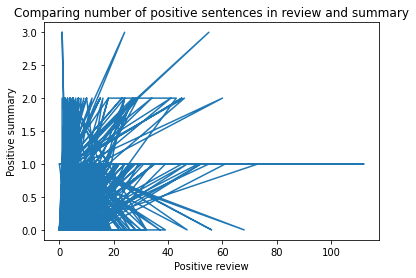

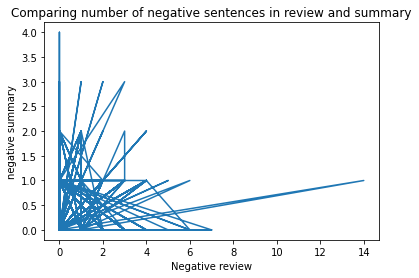

In [ ]:
import matplotlib.pyplot as plt


# Creating twi line graphs

plt.plot(df_final['text_positive'], df_final['summary_positive'])
plt.xlabel("Positive review")  # Adding X-axis label
plt.ylabel("Positive summary")  # Adding Y-axis label
plt.title("Comparing number of positive sentences in review and summary")  # add title
plt.show()


plt.plot(df_final['text_negative'], df_final['summary_negative'])
plt.xlabel("Negative review")  # Adding X-axis label
plt.ylabel("negative summary")  # Adding Y-axis label
plt.title("Comparing number of negative sentences in review and summary")  # add title
plt.show()

# The Plot really doesn't make too much sense!

## Conclusion

It is really hard to make a conclusion from the result, however I believe we have finally reached a point where we can make at least some sense of the data and of the result of out analysis 

Okay, let's start from the beginining:

1) Descriptive statistics

I won't talk much about Descriptive statistics part, because I have already written a short text just before Sentiment analysis section. Overall, I believe in order to reach better result, we should also include the analysis of the bigrams numberically for example. What is the length of bigram list for each one: Review Text or Summary. What is the length of the Noun list and Adjective list. I have did some further analysis on that, and the average length for:

Summary:
Bigrams: 1.83
NN_list: 1.24
NN_lsit: 2.14 

Review:
Bigrams: 5.19
NN_list: 2.25
NN_list: 5.62


2) Sentiment analysis

I started by using the code from the lab 5. I think the movie reviews are really close to our data set, so we should have gotten better results than I did actually. Because our data set also has reviews about Tv shows and series from the Amazon Prime (I suppose), movie reviews are really close to our case. So, that was the reason for me to choose that data set. 
I started applying the code from the lab and got decent results in terms of accuracy, around 74.5. Appying Fscore, Recall and Precision methods I got around the same result.

Using the  multi-fold cross-validation I had similar results in terms of the accuracy. Average of three folds was around 74.5.

After I started applying the negation technique to my sentiment analysis, I noticed that the accuracy of the sentiment analysis improved, especially in cases where negation words were present. The negation technique helped to correctly identify the sentiment of the text data, and the resulting sentiment scores were more accurate and representative of the true sentiment expressed in the text. In general, the number (accuracy and all the iother scores stood at 76/77. 

Finally I removed some stop words, but the accuracy was almost the same, slightly higher standing at 77. 

After, I applied our classifier to the data set that we have. I result aws pretty decent, although I suppose we could have gotten better results. I have got much more positive tags rather than negative tags for both review and summary text. 
Than, I started by creating a new data frame, applied our classifier and got the top Adjectives, Nouns and Verbs for both negative and positive sentences. To be honest, the result for positive sentences makes sense but for the negative sentences I couldn't say so. Because, we have almost the same set of verbs, nouns and adjectives. However, some negative words were also in the top 50, such as "bad".

And finally, I have plotted two graphs as asked in the instructions. Obviously, there is no trend but we can see that there are ususally no more than 2 positive sentences in summary and around no more than 20 (sometimes 40) in reviews.  For negatives, that number is slightly higher in the case of summary (more summary above 2) and slightly lower for summary.

